<h1 style="color:red" align="center"> Projet d'introduction au Machine Learning <br/> Out-Of-Domain PoS Tagging </h1>

In [5]:
import dataAnalysis as da
import pandas as pds
import matplotlib.pyplot as plt

In [6]:
print(da.listeCorpus)

['fr.foot.test.json', 'fr.gsd.test.json', 'fr.sequoia.train.json', 'fr.ftb.test.json', 'fr.ftb.dev.json', 'fr.spoken.test.json', 'fr.pud.train.json', 'fr.spoken.train.json', 'fr.natdis.test.json', 'fr.partut.dev.json', 'fr.sequoia.test.json', 'fr.gsd.dev.json', 'fr.sequoia.dev.json', 'fr.gsd.train.json', 'fr.pud.test.json', 'fr.ftb.train.json', 'fr.partut.test.json', 'fr.partut.train.json', 'fr.spoken.dev.json']


In [26]:
dataAnalyse = da.dataAnalysis()
corpusDesc = {
                "nom du corpus" : da.listeCorpus, 
                "exemple de phrase": dataAnalyse[0],
                "nombre de phrase" : dataAnalyse[1],
                "nombre d'élément distinct (mot, ponctuation, ..) dans le corpus": dataAnalyse[2]
                }
corpusDataFrame = pds.DataFrame(data=corpusDesc)
corpusDataFrame.sort_values("nom du corpus", axis = 0, ascending = True, inplace = True, na_position ='last')
corpusDataFrame

,nom du corpus,exemple de phrase,nombre de phrase,"nombre d'élément distinct (mot, ponctuation, ..) dans le corpus"
0,fr.foot.test.json,Barça - Juventus sa seras du gâteau pour le Ba...,743,13985
4,fr.ftb.dev.json,Nous prions les cinéastes et tous nos lecteurs...,1235,38763
3,fr.ftb.test.json,La limite des intérêts des emprunts contractés...,2541,75073
15,fr.ftb.train.json,"Certes , rien ne dit qu' une seconde motion de...",14759,442228
11,fr.gsd.dev.json,"Aviator , un film sur la vie de Hughes .",1476,34664
1,fr.gsd.test.json,Je sens qu' entre ça et les films de médecins ...,416,9742
13,fr.gsd.train.json,Les commotions cérébrales sont devenu si coura...,14450,345009
8,fr.natdis.test.json,Cette vague de chaleur en Inde m' attriste bea...,622,12044
9,fr.partut.dev.json,Creative Commons n' est pas un cabinet d' avoc...,107,1822
16,fr.partut.test.json,Paternité - Partage des conditions initiales à...,110,2515


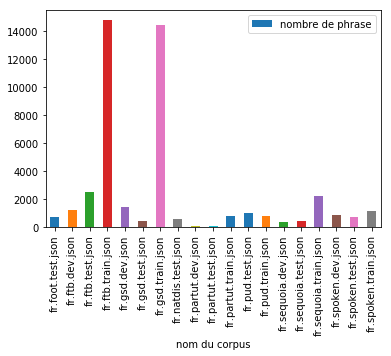

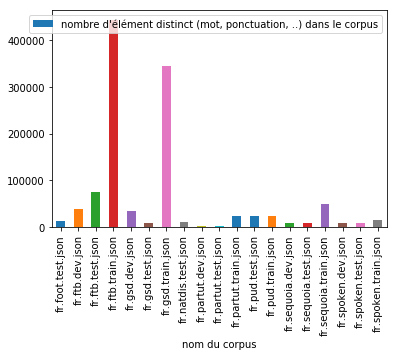

In [27]:
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre de phrase')
corpusDataFrame.plot(kind='bar',x='nom du corpus',y='nombre d\'élément distinct (mot, ponctuation, ..) dans le corpus')